# Problem Statement
In this assignment we have to build a multiple linear regression model for the prediction of demand for shared bikes. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:</br>
    1. Which variables are significant in predicting the demand for shared bikes.</br>
    2. How well those variables describe the bike demands </br>

# Methods we follwed

In [61]:
#importing warnings module to filter unwanted warnings
import warnings
warnings.filterwarnings(action="ignore")

In [62]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [63]:
#reading the input file into a pandas dataframe
bike = pd.read_csv(r"C:\Users\sivaskandan\Desktop\STUDY NOTES\UPGRAD AI AND ML\bike case study\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [64]:
#Analysing the shape and presence of null values in dataset
print(bike.shape)
print(bike.info())

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


#### 1. The total number of rows is matching with the count of non-null rows. Hence, There are no null values available in the input dataset
#### 2. The the dteday column is of dtype object. It need to be converted to appropriate datatype. 


In [65]:
print(bike.dteday.head())
#converting dteday column to datetime type
bike['dteday'] = pd.to_datetime(bike['dteday'])
print(bike.info())

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  73

#### There are categorical columns with numeric values it will cause error when training model. Hence converting it to categorical values.

In [66]:
#Converting categorical variable to string type for better readablity (yr)
print("Before change :")
print(bike.yr.value_counts())
bike.yr = bike.yr.apply(lambda x : "2018" if x == 0 else "2019" if x == 1 else "NAN")
bike.yr.value_counts()
print("After change :")
print(bike.yr.value_counts())


Before change :
0    365
1    365
Name: yr, dtype: int64
After change :
2018    365
2019    365
Name: yr, dtype: int64


In [67]:
#Converting categorical variable to string type for better readablity (weathersit)
print("Before change :")
print(bike.weathersit.value_counts())
bike.weathersit = bike.weathersit.apply(lambda x : 'clear' if x == 1 else 'mist' if x == 2 else 'light' if x == 3 else 'heave' if x == 4 else NAN)
print("After change :")
print(bike.weathersit.value_counts())

Before change :
1    463
2    246
3     21
Name: weathersit, dtype: int64
After change :
clear    463
mist     246
light     21
Name: weathersit, dtype: int64


In [68]:
#Converting categorical variable to string type for better readablity (season)
print("Before change :")
print(bike.season.value_counts())
bike.season = bike.season.apply(lambda x : 'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else 'winter' if x == 4 else NAN)
print("After change :")
print(bike.season.value_counts())

Before change :
3    188
2    184
1    180
4    178
Name: season, dtype: int64
After change :
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [69]:
#Converting categorical variable to string type for better readablity (weekday)
#we could see in dataset that 01-01-2018 is given the weekday of 6 which is monday.
print("Before change :")
print(bike.weekday.value_counts())
bike.weekday = bike.weekday.apply(lambda x : 'mon' if x == 6 else 'tue' if x == 0 else 'wed' if x == 1 else 'thr' if x == 2 else 'fri' if x == 3 else 'sat' if x == 4 else 'sun' if x == 5 else "NAN")
print("After change :")
print(bike.weekday.value_counts())

Before change :
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
After change :
mon    105
tue    105
wed    105
thr    104
sat    104
sun    104
fri    103
Name: weekday, dtype: int64


In [70]:
#Converting categorical variable to string type for better readablity (workday)
print("Before change :")
print(bike.workingday.value_counts())
bike.workingday = bike.workingday.apply(lambda x : 'y' if x == 1 else 'n' if x == 0 else "NAN")
print("After change :")
print(bike.workingday.value_counts())

Before change :
1    499
0    231
Name: workingday, dtype: int64
After change :
y    499
n    231
Name: workingday, dtype: int64


In [71]:
#Converting categorical variable to string type for better readablity (holiday)
print("Before change :")
print(bike.holiday.value_counts())
bike.holiday = bike.holiday.apply(lambda x : 'y' if x == 1 else 'n' if x == 0 else "NAN")
print("After change :")
print(bike.holiday.value_counts())

Before change :
0    709
1     21
Name: holiday, dtype: int64
After change :
n    709
y     21
Name: holiday, dtype: int64


In [72]:
#Converting categorical variable to string type for better readablity (month)
print("Before change :")
print(bike.mnth.value_counts())
bike.mnth = bike.mnth.apply(lambda x : 'jan' if x == 1 else 'feb' if x == 2 else 'mar' if x == 3 else 'apr' if x == 4 else 'may' if x == 5 else 'jun' if x == 6 else 'jul' if x == 7 else 'aug' if x == 8 else 'sep' if x == 9 else 'oct' if x == 10 else 'nov' if x == 11 else 'dec' if x == 12 else "NAN")
print("After change :")
print(bike.mnth.value_counts())

Before change :
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
After change :
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64


In [73]:
#print the columns of bike dataset to identify continous and categorical variables
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,jan,n,mon,n,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,jan,n,tue,n,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,jan,n,wed,y,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,jan,n,thr,y,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,jan,n,fri,y,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
print(bike.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


All Categorical variables with numeric encoding are converted to categorical variables

In [75]:
#print the columns of bike dataset to identify continous and categorical variables
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,jan,n,mon,n,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,jan,n,tue,n,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,jan,n,wed,y,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,jan,n,thr,y,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,jan,n,fri,y,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Dropping unwanted coulumns - 
1. instant - It doesnt hold any significance
2. dteday - Since we have yr,mnth and weekday columns it is redundant
3. casual and registered - Since the count varible is the sum of casual + registered

In [76]:
bike = bike.drop(columns = ["instant","dteday","casual","registered"])

In [77]:
#CATEGORICAL VARIABLES    
cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
#CONTINOUS VARIABLES
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [78]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,n,mon,n,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,n,tue,n,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,n,wed,y,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,n,thr,y,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,n,fri,y,clear,9.305237,11.46350,43.6957,12.522300,1600


## UNIVARIATE ANALYSIS

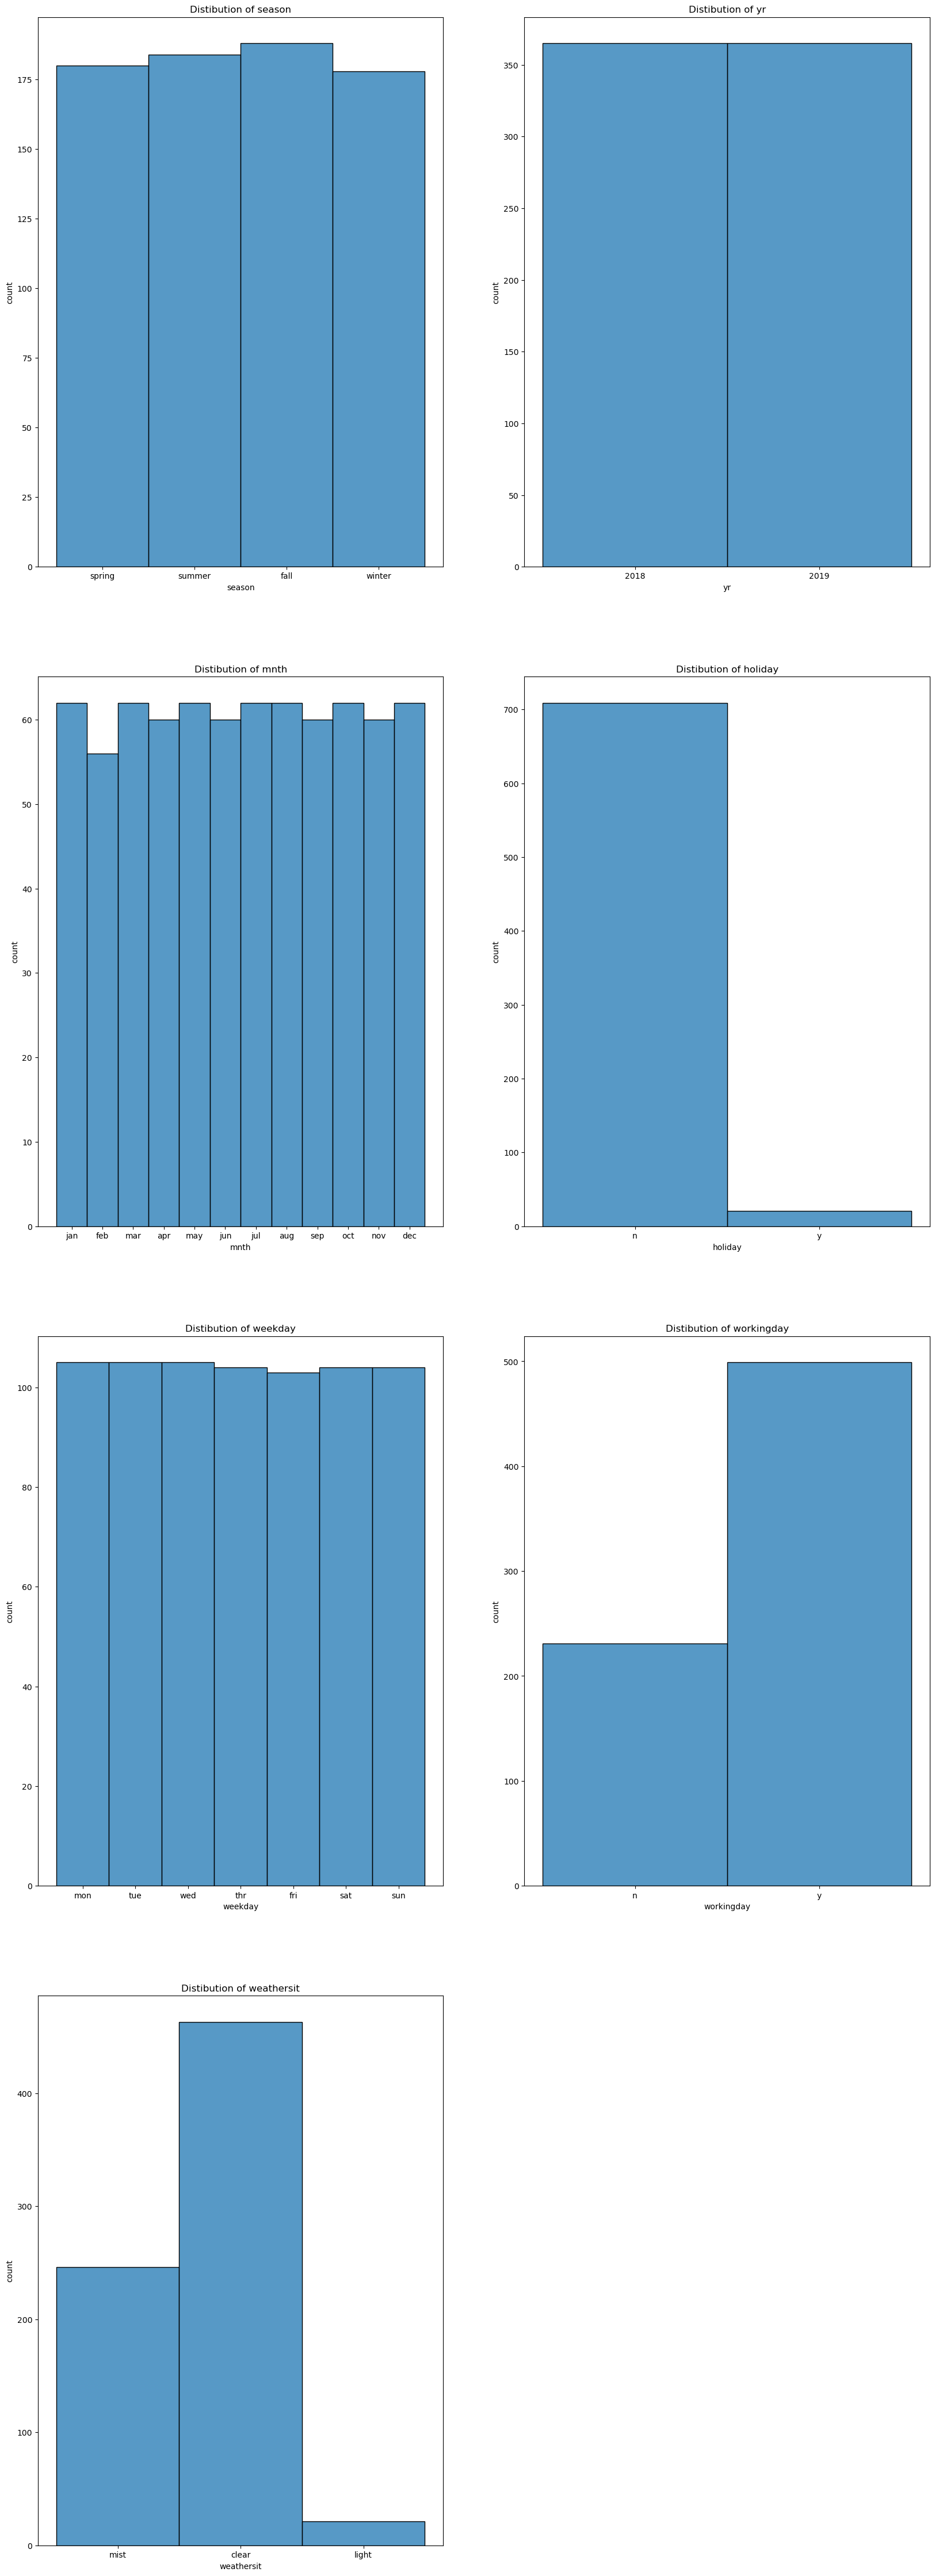

In [79]:
#plotting the histogram of all categorical variables to check the distribution of all categorical variable.
plt.figure(figsize=(20,50))
for i,v in enumerate(cat_var):
  plt.subplot(4,2,i+1)
  sns.histplot(bike[v], bins = 12)
  plt.title("Distibution of " +v)
  plt.xlabel(v)
  plt.ylabel('count')
  plt.subplots_adjust(bottom=0.001) #adjust the title of one figure to xlabel of another
plt.show()

<Figure size 1200x1800 with 0 Axes>

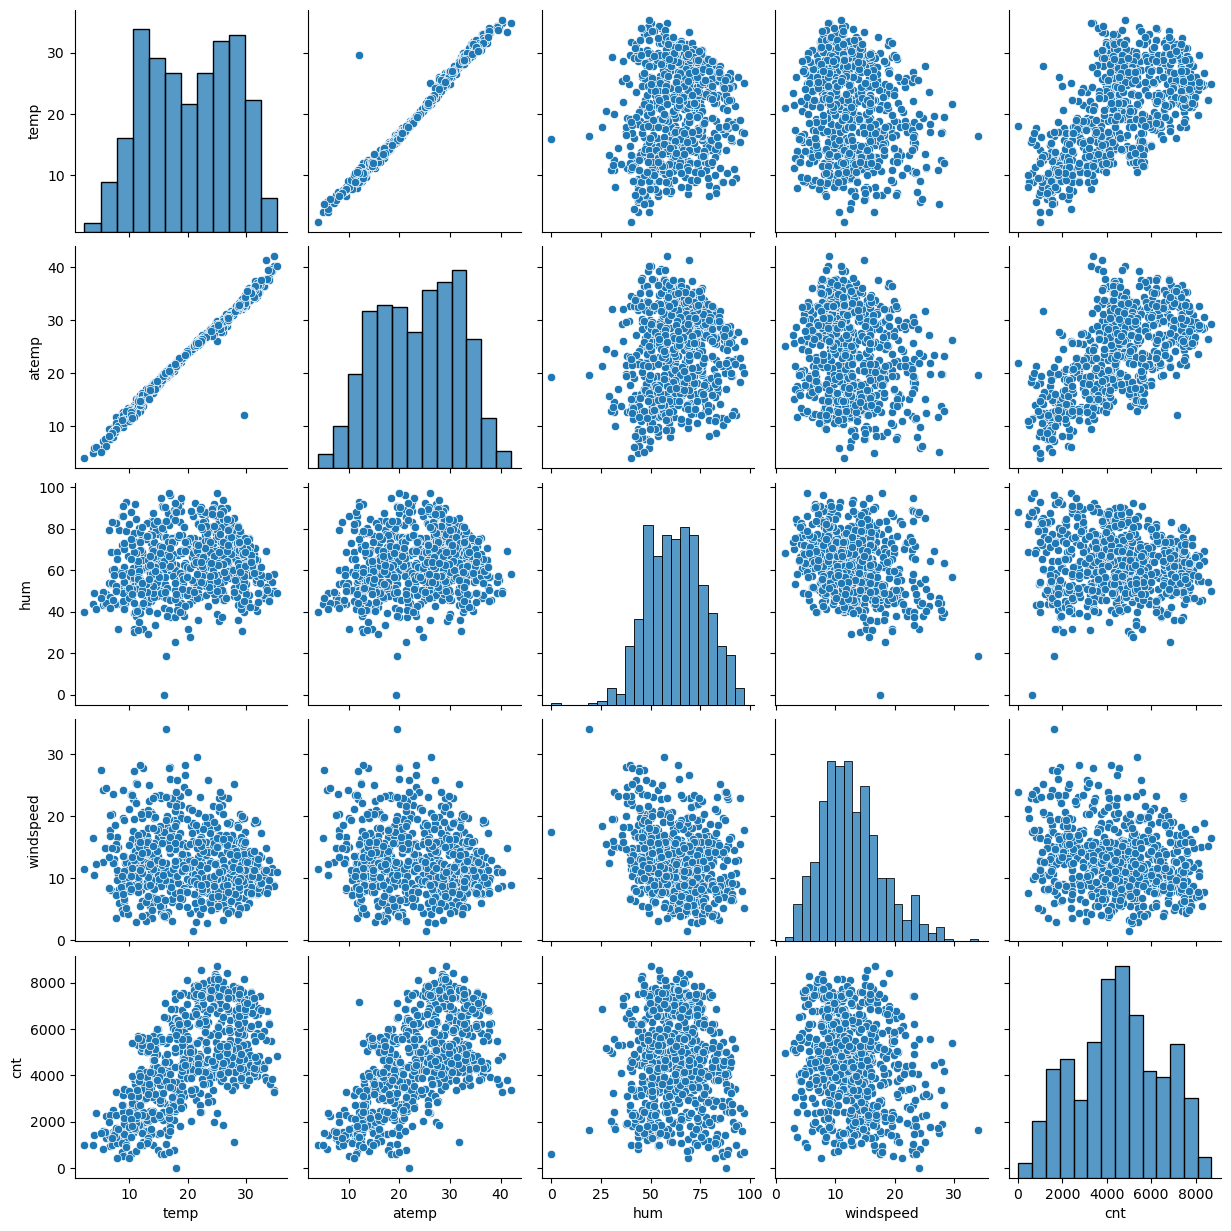

In [80]:
#Plotting the pairplot of all numerical variable check for any patterns
plt.figure(figsize=(12,18))
sns.pairplot(bike[num_var])
plt.show()


## Observations:
1. There is a strong corelation with temp and atemp. 
2. There is a positive corelation between count and temp.

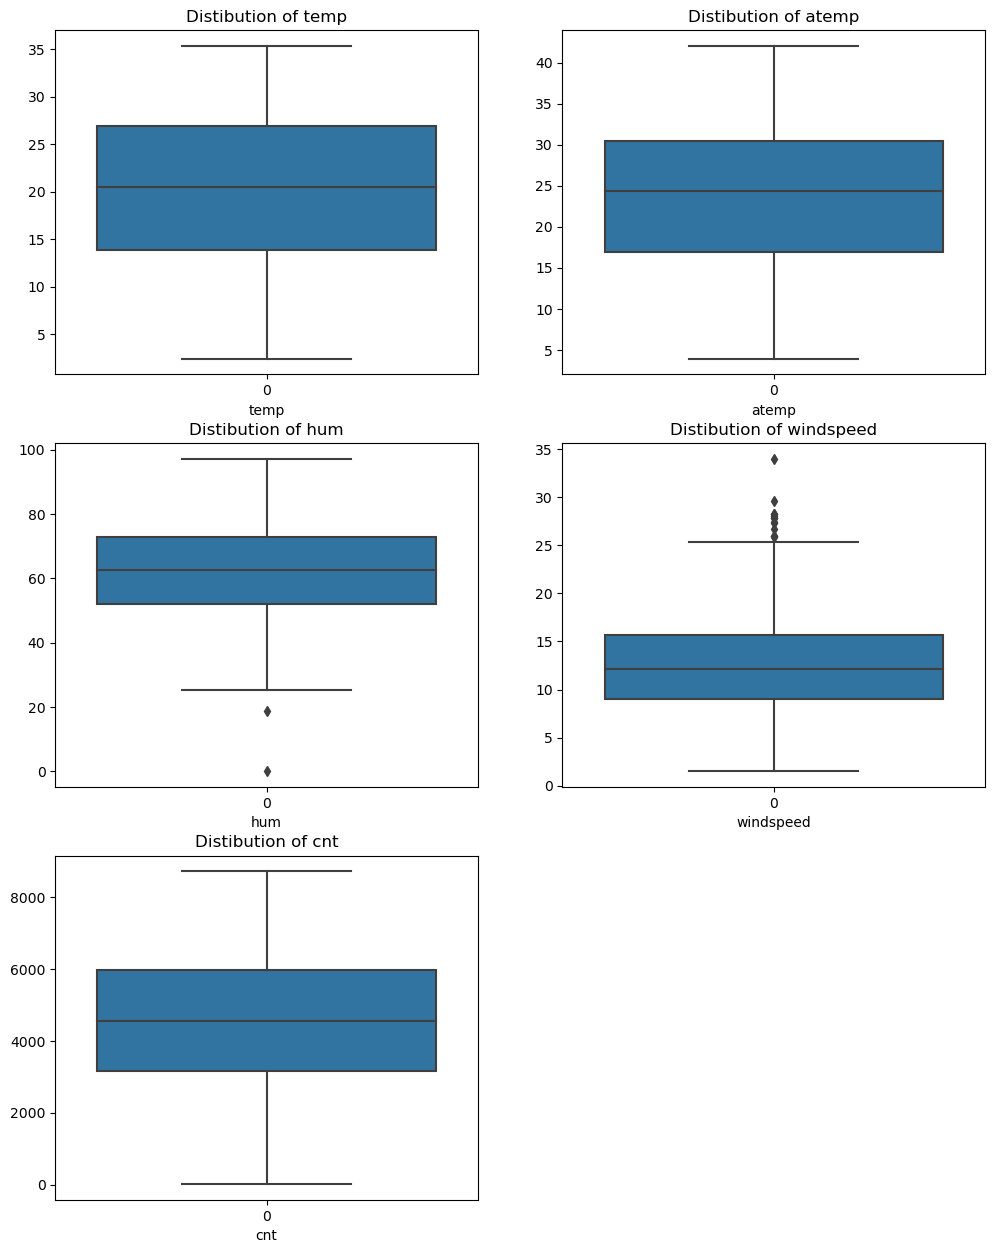

In [81]:
#Plotting the box plot of numerical variables to check its spread 
plt.figure(figsize=(12,18))
for i,v in enumerate(num_var):
  plt.subplot(4,2,i+1)
  sns.boxplot(bike[v])
  plt.title("Distibution of " +v)
  plt.xlabel(v)
  plt.ylabel('')
  plt.subplots_adjust(bottom=0.001) #to add some distance between plots for better readablity
plt.show()

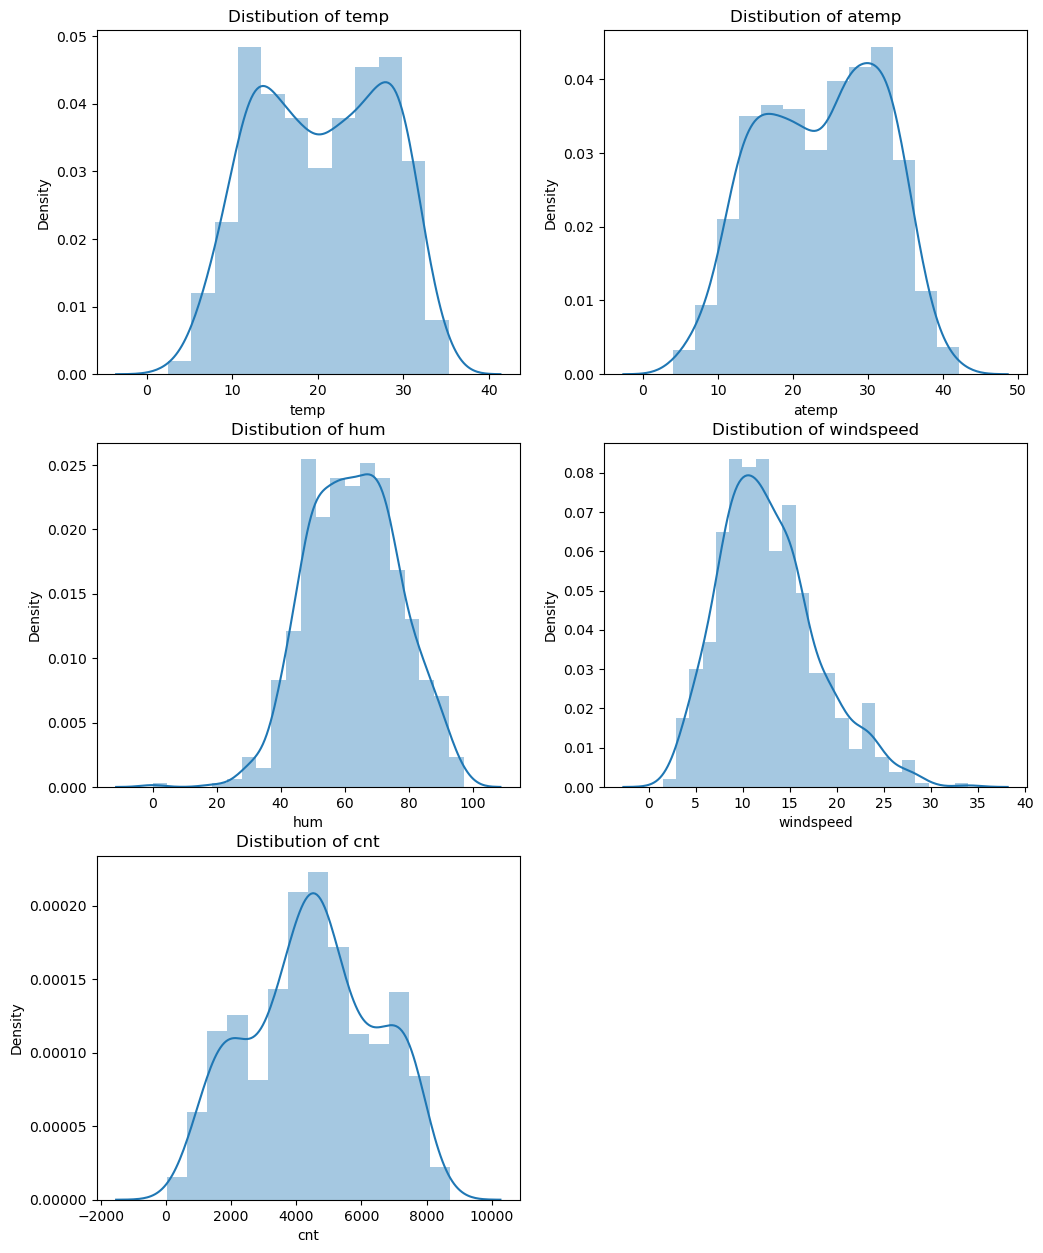

In [82]:
#Plotting the dist plot to view the distribution of numerical variables
plt.figure(figsize=(12,18))
for i,v in enumerate(num_var):
  plt.subplot(4,2,i+1)
  sns.distplot(bike[v])
  plt.title("Distibution of " +v)
  plt.xlabel(v)
  plt.ylabel('Density')
  plt.subplots_adjust(bottom=0.001) #to add some distance between plots for better readablity
plt.show()

## BIVARIATE ANALYSIS

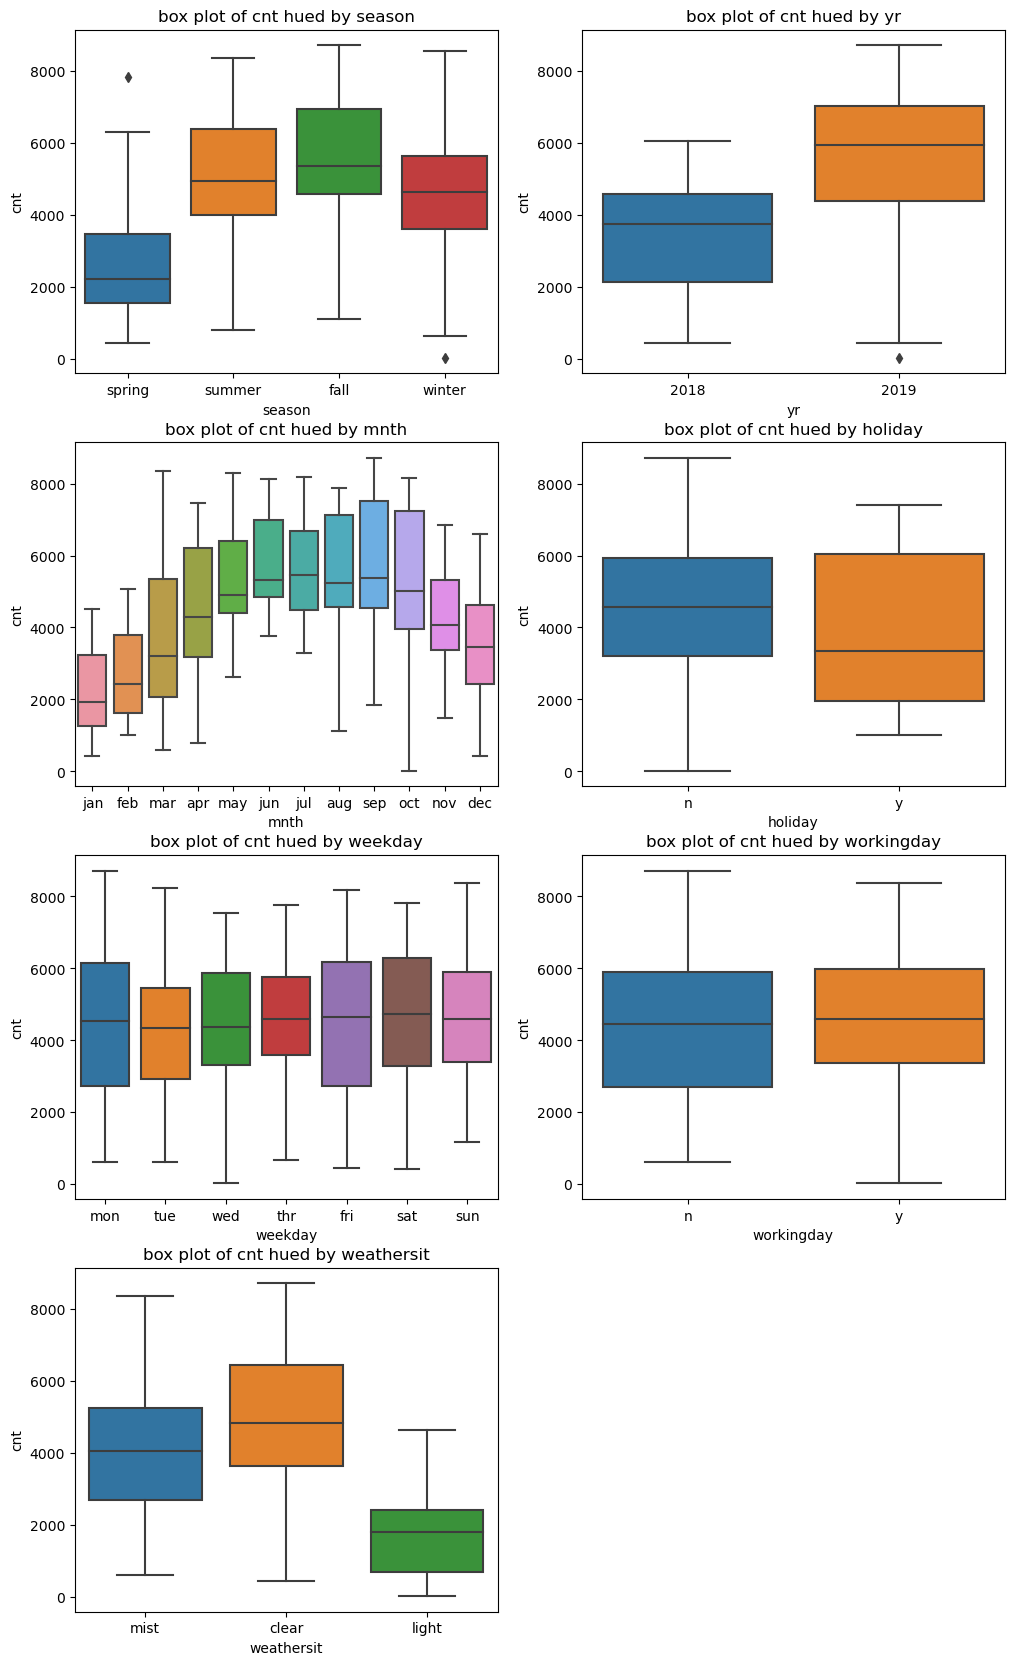

In [83]:
#Plotting the box plot of count variable segmented by each categorical variable. 
plt.figure(figsize=(12,18))
for i,v in enumerate(cat_var):
  plt.subplot(4,2,i+1)
  sns.boxplot(bike, x = v, y = 'cnt')
  plt.title("box plot of cnt hued by " +v)
  plt.xlabel(v)   
  plt.ylabel('cnt')
  plt.subplots_adjust(bottom=0.001) #adjust the title of one figure to xlabel of another
plt.show()

 ## Observations:
 1. More people are taking bikes in clear weather.
 2. From Jul to Oct there is a considerable increase in number of people taking bikes
 3. By combining the results of above point and from plot of cnt and season. We can conclude the Fall and summer are important months for people taking bikes.
 4. There is a considerable increase in people taking bikes in 2019 when compared to 2018

<AxesSubplot: >

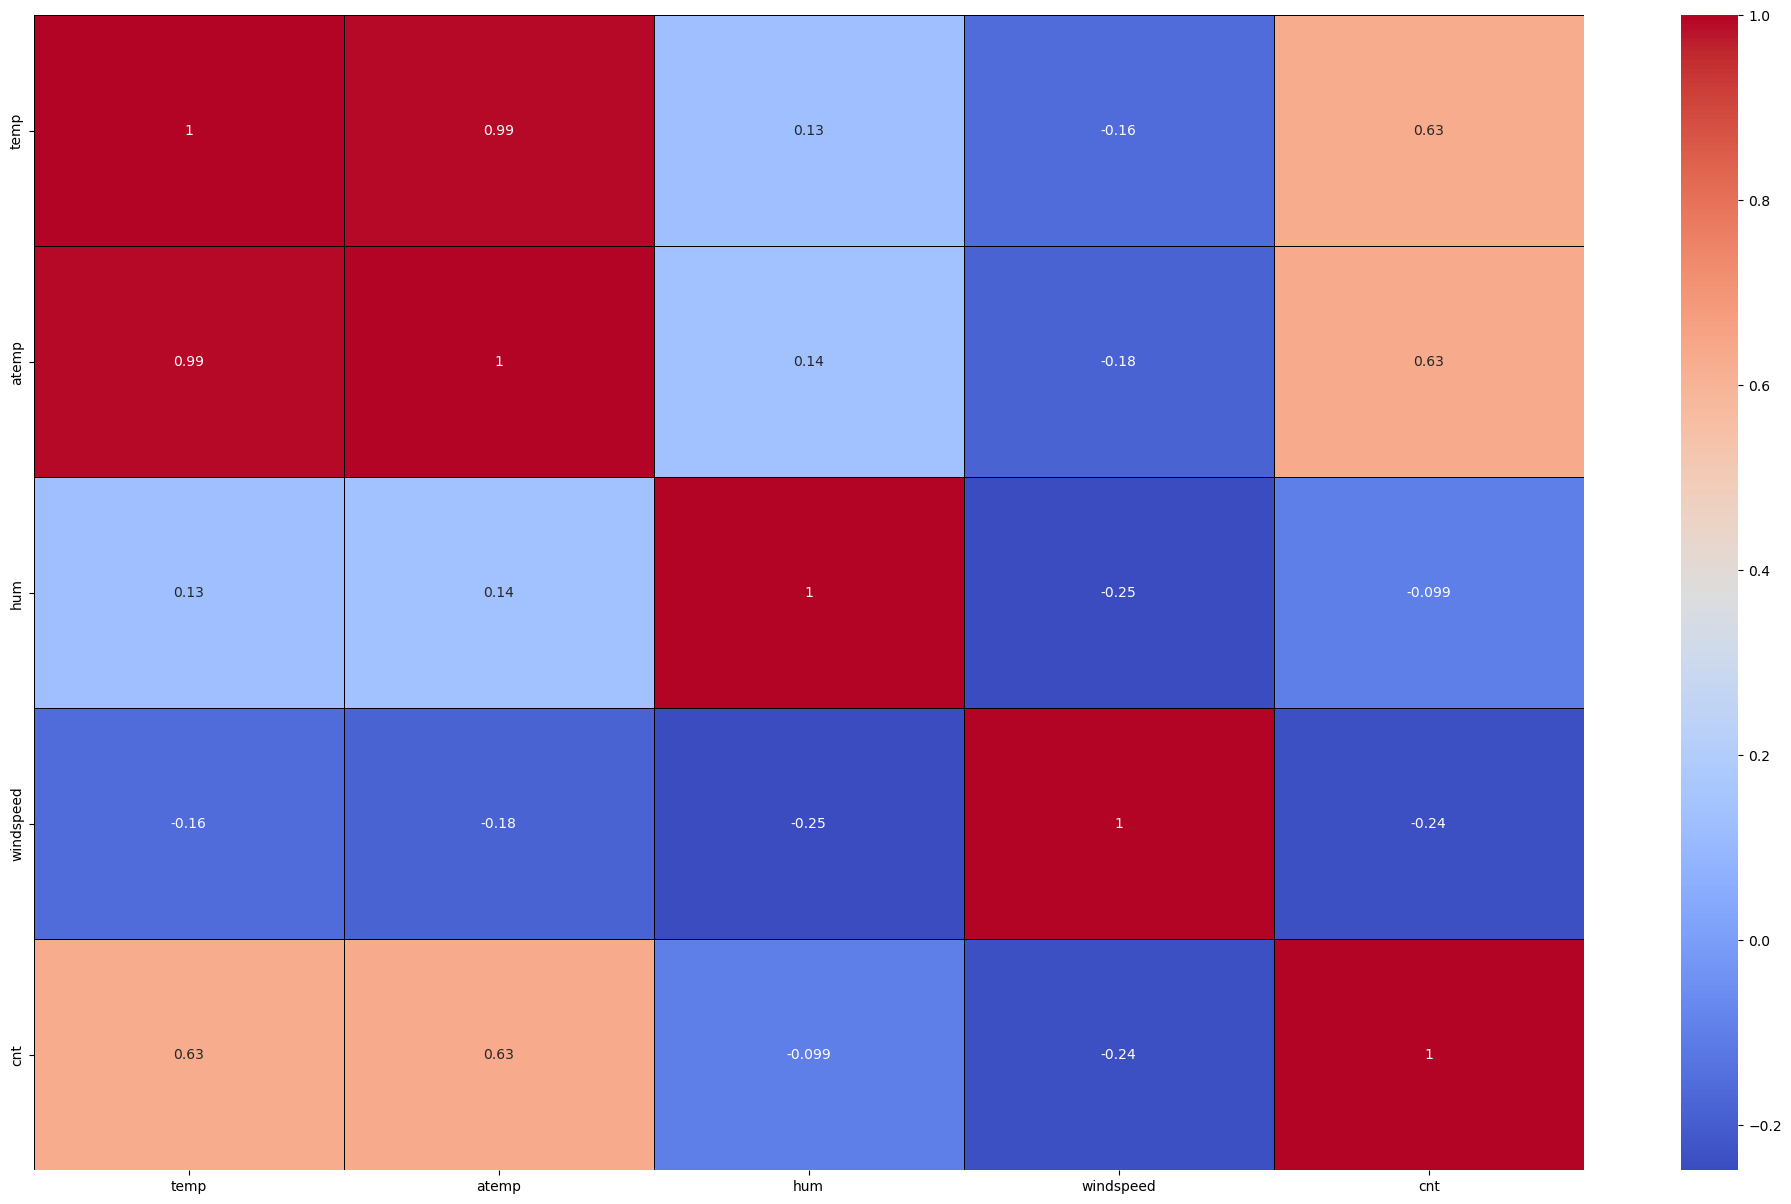

In [84]:
# Plotting the heatmap to analyse the correlation of each varaible
plt.figure(figsize=(25,15))
sns.heatmap(data=bike.corr(), annot = True, cmap="coolwarm", linecolor = "black", linewidth=.5)

## Observations:
1. The temp and atemp as very high corelation. Could be due to atemp is getting derived from temp.

# Data preparation for model building
### Creating dummy variables for all categorical variables

In [85]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [86]:
# creating dummie variables for all catagorical varaible and droping the first column.
bikeDum = pd.get_dummies(data=bike, columns = cat_var, drop_first = True)    

In [87]:
bikeDum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              730 non-null    float64
 1   atemp             730 non-null    float64
 2   hum               730 non-null    float64
 3   windspeed         730 non-null    float64
 4   cnt               730 non-null    int64  
 5   season_spring     730 non-null    uint8  
 6   season_summer     730 non-null    uint8  
 7   season_winter     730 non-null    uint8  
 8   yr_2019           730 non-null    uint8  
 9   mnth_aug          730 non-null    uint8  
 10  mnth_dec          730 non-null    uint8  
 11  mnth_feb          730 non-null    uint8  
 12  mnth_jan          730 non-null    uint8  
 13  mnth_jul          730 non-null    uint8  
 14  mnth_jun          730 non-null    uint8  
 15  mnth_mar          730 non-null    uint8  
 16  mnth_may          730 non-null    uint8  
 1

In [88]:
bikeDum.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sep', 'holiday_y', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thr', 'weekday_tue',
       'weekday_wed', 'workingday_y', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

After creating dummie variables we have 29 variables excluding cnt (target variable)

In [89]:
# Checking the table after creating dummie columns
bikeDum.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,...,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,workingday_y,weathersit_light,weathersit_mist
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting data in train and test sets
The train and test sets are created in proportion of 0.7 and 0.3.

In [90]:
bike_train, bike_test = train_test_split(bikeDum, train_size = 0.7, test_size = 0.3, random_state = 101)

In [91]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(219, 30)


## Rescaling the variables

The MinMax Scaler is used because it includes outliers.

In [92]:
# initilasing minmaxscaler object.
Scaler = MinMaxScaler()
# fitting and transforming the train dataset.
bike_train[num_var] = Scaler.fit_transform(bike_train[num_var])

In [93]:
# Analysing the bike dataset after scaling
bike_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,...,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,workingday_y,weathersit_light,weathersit_mist
53,0.202618,0.218747,0.300481,0.147857,0.222079,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
117,0.695756,0.656133,0.655484,0.615407,0.472987,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
712,0.277292,0.282377,0.581470,0.224374,0.654987,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
60,0.343747,0.316347,0.334397,0.588452,0.247510,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72,0.331557,0.332005,0.394939,0.236118,0.237197,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [94]:
# Analysing the min and max values to verify if scaling is applied
bike_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,...,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,workingday_y,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.542359,0.518543,0.560420,0.342352,0.524230,0.254902,0.250980,0.241176,0.509804,0.076471,...,0.027451,0.156863,0.158824,0.127451,0.137255,0.139216,0.145098,0.676471,0.029412,0.327451
std,0.229123,0.214342,0.180231,0.162937,0.227078,0.436234,0.434003,0.428217,0.500395,0.266010,...,0.163554,0.364028,0.365870,0.333805,0.344454,0.346511,0.352545,0.468282,0.169124,0.469744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344007,0.339750,0.427182,0.224692,0.374810,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.529616,0.516890,0.564962,0.318604,0.525958,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.742483,0.695494,0.691027,0.434629,0.691023,1.000000,0.750000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the model


<AxesSubplot: >

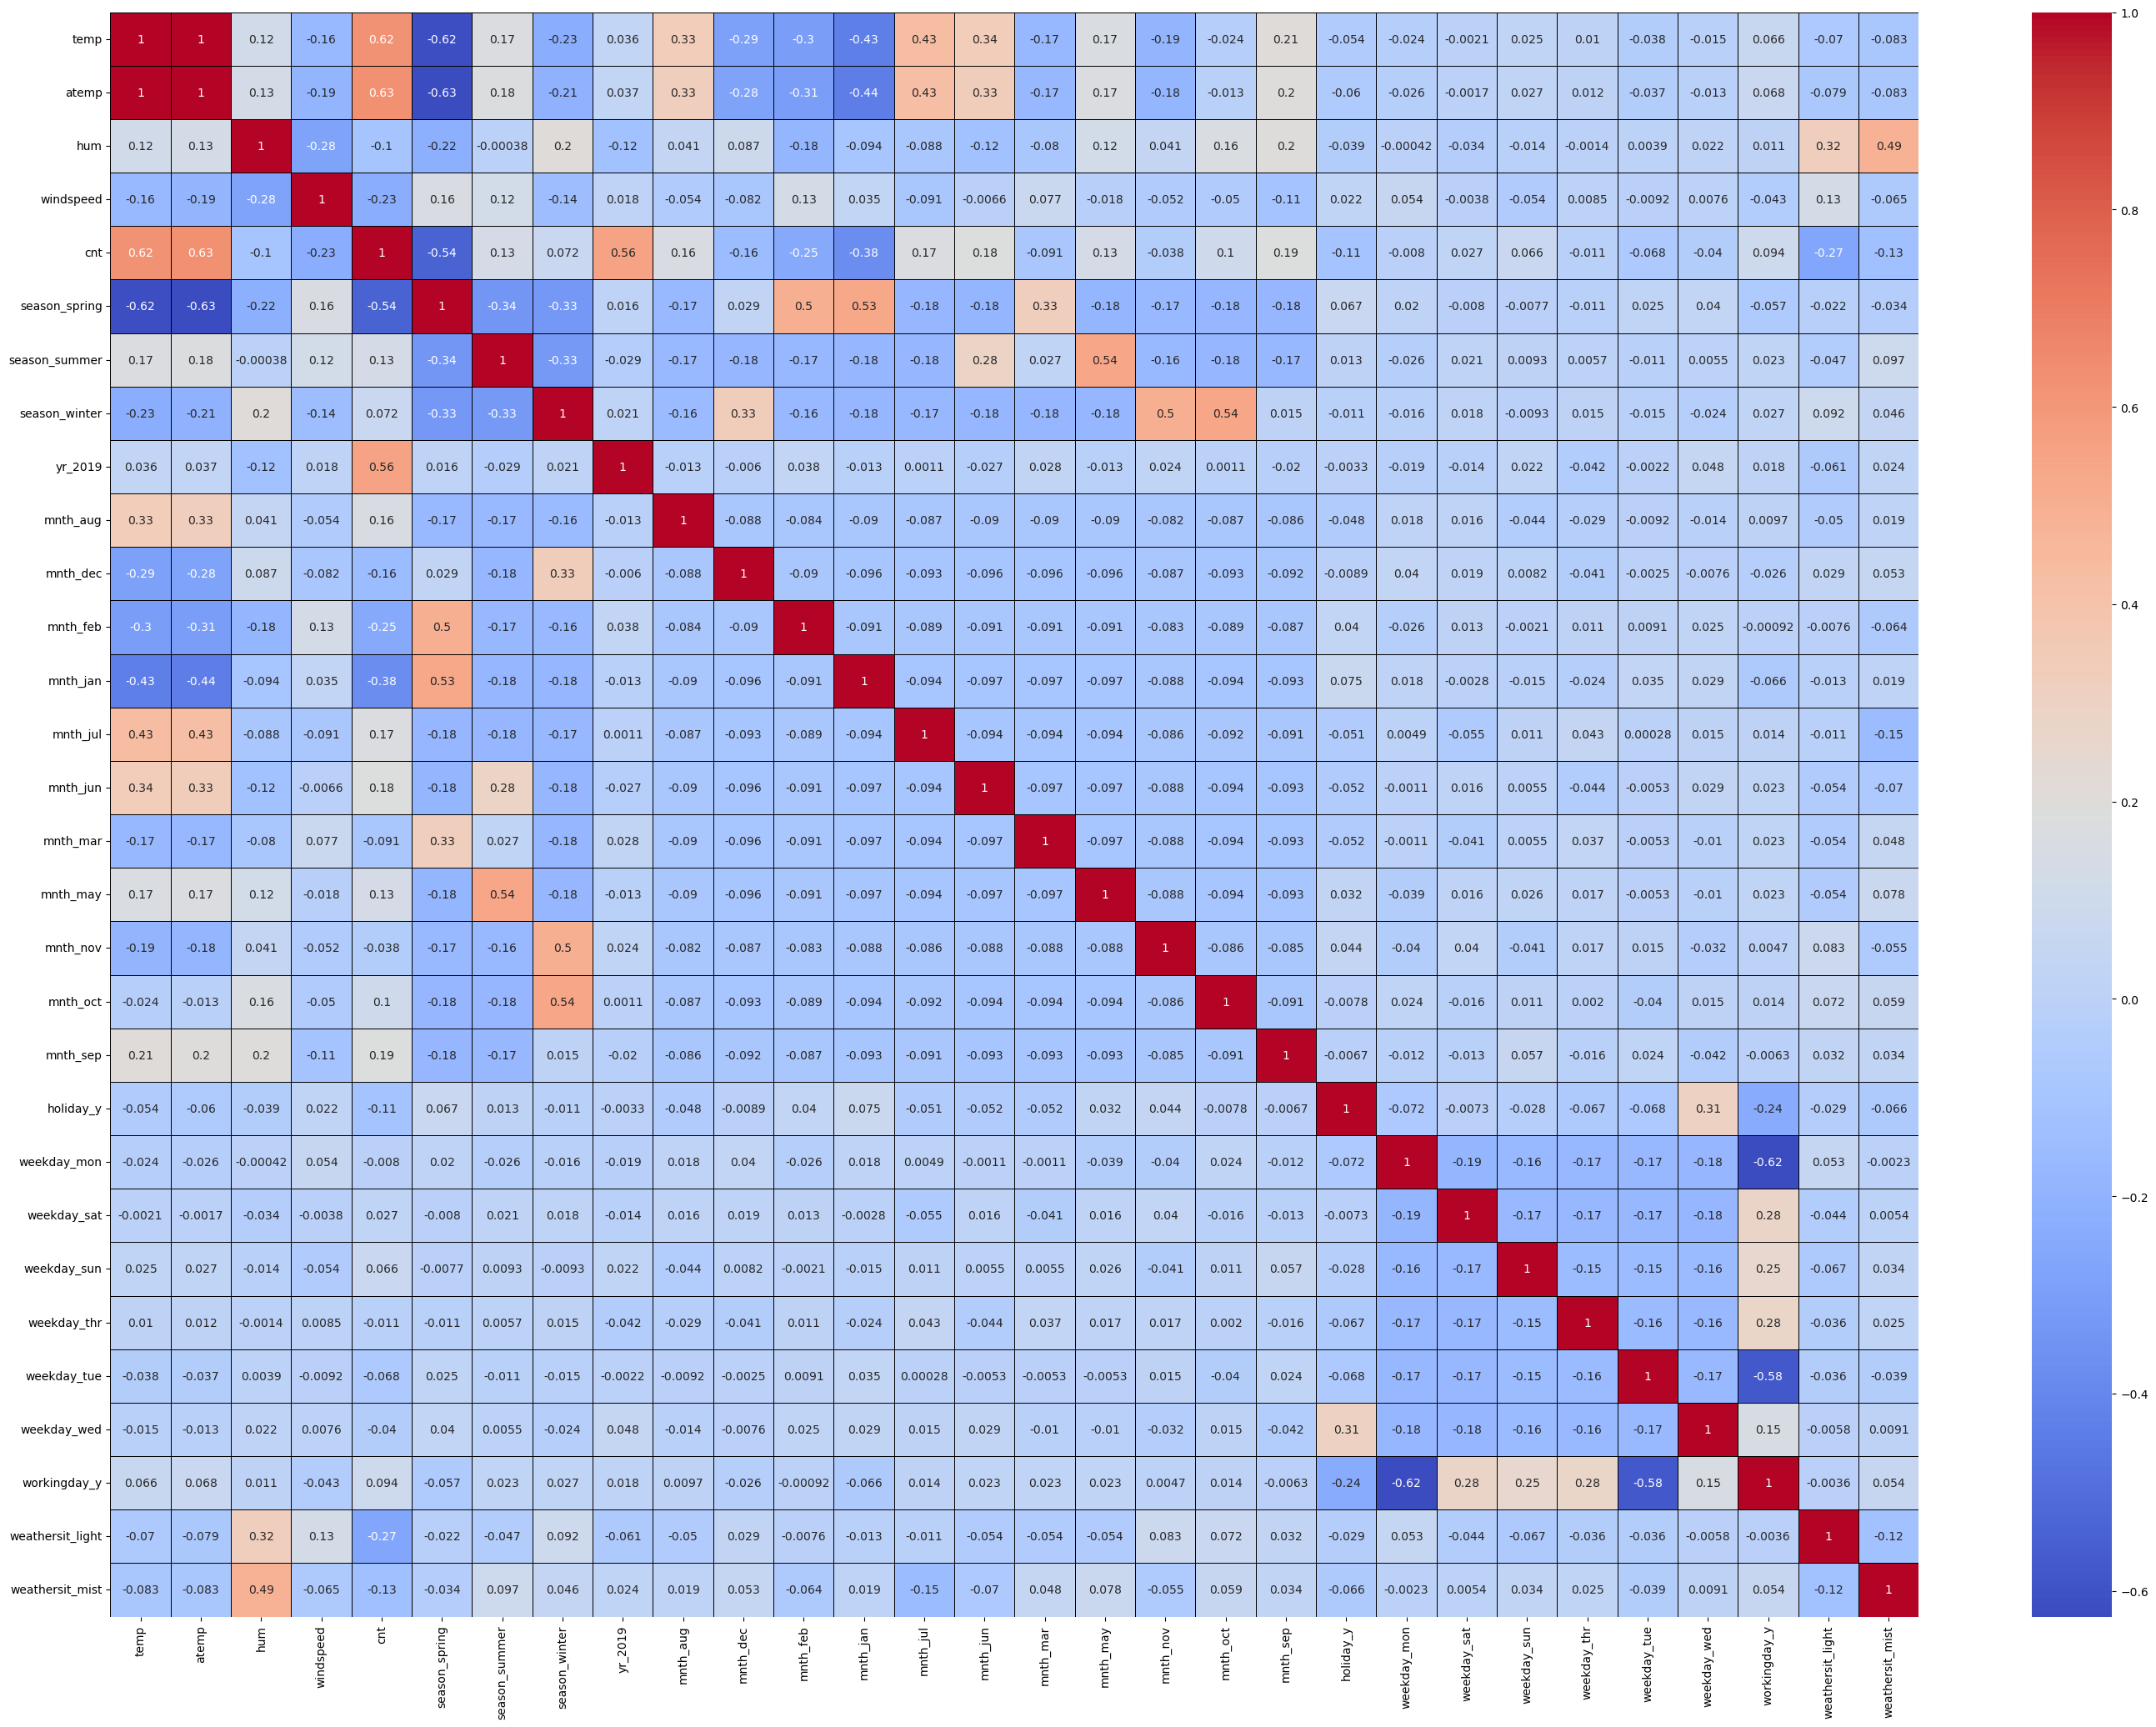

In [95]:
# Plotting the heat map of bike train dataset to to see the correaltion of each variable.
plt.figure(figsize=(35,25))
sns.heatmap(bike_train.corr(), annot = True, cmap="coolwarm", linecolor = "black", linewidth=.5)

In [96]:
bike_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,...,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,workingday_y,weathersit_light,weathersit_mist
53,0.202618,0.218747,0.300481,0.147857,0.222079,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
117,0.695756,0.656133,0.655484,0.615407,0.472987,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
712,0.277292,0.282377,0.581470,0.224374,0.654987,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
60,0.343747,0.316347,0.334397,0.588452,0.247510,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72,0.331557,0.332005,0.394939,0.236118,0.237197,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [97]:
#creating x_train and y_train dataset by removing target variable (cnt) from bike_train
y_train = bike_train.pop('cnt')
x_train = bike_train

In [98]:
x_train.head()


,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,workingday_y,weathersit_light,weathersit_mist
53,0.202618,0.218747,0.300481,0.147857,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
117,0.695756,0.656133,0.655484,0.615407,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
712,0.277292,0.282377,0.581470,0.224374,0,0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0
60,0.343747,0.316347,0.334397,0.588452,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72,0.331557,0.332005,0.394939,0.236118,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [99]:
print(y_train.head())

53     0.222079
117    0.472987
712    0.654987
60     0.247510
72     0.237197
Name: cnt, dtype: float64


## RFE:
We have total of 29 columns manually adding or removing 29 columns will not be a good approach. So we can use the RFE to select best 15 features from our dataset and then we will reduce the columns manually using top down approach.

In [100]:
# Declaring Linear regression object
lr = LinearRegression()
# Fitting xtrain and ytrain
lr.fit(x_train,y_train)
# running RFE on lr with number of features as 15
rfe = RFE(lr,n_features_to_select = 15)
rfe = rfe.fit(x_train,y_train)

In [101]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('temp', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 6),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('holiday_y', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', False, 13),
 ('weekday_sun', False, 14),
 ('weekday_thr', False, 9),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 7),
 ('workingday_y', False, 4),
 ('weathersit_light', True, 1),
 ('weathersit_mist', True, 1)]

In [102]:
# Analysing the columns that RFE excluded
x_train.columns[~(rfe.support_)] 

Index(['temp', 'season_summer', 'mnth_aug', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thr',
       'weekday_tue', 'weekday_wed', 'workingday_y'],
      dtype='object')

In [103]:
#Creating a variable col to hold the list of columns suggested by RFE. 
col = x_train.columns[rfe.support_]
col

Index(['atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'holiday_y', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

# Model 1

In [104]:
# create a train dataframe with rfe suggested variables
x_train_rfe = x_train[col]
# Adding a constant value since we are using statsmodels to train our model.
x_train_rfe = sm.add_constant(x_train_rfe)

In [105]:
lm = sm.OLS(y_train,x_train_rfe).fit() # Running the linear model

In [106]:
# viewing the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     167.0
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.23e-182
Time:                        11:04:09   Log-Likelihood:                 492.80
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     494   BIC:                            -885.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3878      0.033  

1. The R2 and adj R2 is 0.835 and 0.83 which is good.
2. The P values for all columns is less than 0.05


We can check the VIF values to check for multicollinearity

In [107]:
# importing variaance inflation factor to calculate VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# droping the const variable since it is added for our stats model to train linear regression.
X_train_new = x_train_rfe.drop(['const'], axis=1)
# Declaring a dataframe vf
vif = pd.DataFrame()
# Calculating VIF
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,18.76
0,atemp,14.41
2,windspeed,4.54
3,season_spring,4.20
4,season_winter,2.73
14,weathersit_mist,2.50
8,mnth_jan,2.25
5,yr_2019,2.12
7,mnth_feb,2.04
10,mnth_nov,1.72


## Observation:
The hum and atemp is having a very high VIF. Lets first drop hum to see if VIF of atemp is getting reduced.

In [108]:
#droping hum
x_train_rfe =  x_train_rfe.drop(columns = "hum")
x_train_rfe.columns

Index(['const', 'atemp', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'holiday_y', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

# Model 2

In [109]:
# adding a constant to train dataset
x_train_rfe = sm.add_constant(x_train_rfe)

In [110]:
lm = sm.OLS(y_train,x_train_rfe).fit()
# viewing the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     170.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          5.40e-179
Time:                        11:04:09   Log-Likelihood:                 482.03
No. Observations:                 510   AIC:                            -934.1
Df Residuals:                     495   BIC:                            -870.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3186      0.030  

1. The R2 and adj R2 is 0.828 and 0.823 which is good.
2. The P values for all columns is less than 0.05


We can check the VIF values to check for multicollinearity

In [111]:
X_train_new = x_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,5.02
1,windspeed,4.53
2,season_spring,3.85
3,season_winter,2.45
7,mnth_jan,2.18
4,yr_2019,2.08
6,mnth_feb,2.03
9,mnth_nov,1.68
5,mnth_dec,1.56
13,weathersit_mist,1.51


The atemp has high VIF but from heatmap we know that it has high corelation. Lets try to remove wind speed.

In [112]:
#droping windspeed
x_train_rfe =  x_train_rfe.drop(columns = "windspeed")
x_train_rfe.columns

Index(['const', 'atemp', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep',
       'holiday_y', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

# Model 3

In [113]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [114]:
lm = sm.OLS(y_train,x_train_rfe).fit()
# viewing the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.0
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.03e-174
Time:                        11:04:09   Log-Likelihood:                 469.13
No. Observations:                 510   AIC:                            -910.3
Df Residuals:                     496   BIC:                            -851.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2396      0.026  

1. The R2 and adj R2 is 0.819 and 0.815 which is good.
2. The P values for all columns is less than 0.05


We can check the VIF values to check for multicollinearity

In [115]:
# Calculating VIF
X_train_new = x_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,season_spring,3.56
0,atemp,2.98
2,season_winter,2.44
6,mnth_jan,2.17
3,yr_2019,2.07
5,mnth_feb,2.02
8,mnth_nov,1.67
4,mnth_dec,1.56
12,weathersit_mist,1.50
7,mnth_jul,1.39


# Residual Analysis

Check the distribution of error terms using distplot

In [116]:
# prdecting the values for x_train
y_train_cnt = lm.predict(x_train_rfe)

Text(0.5, 0, 'Errors')

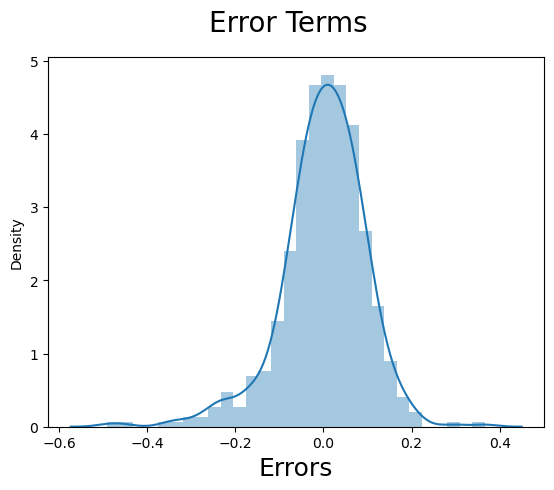

In [117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

1. The error terms is centered around 0.
2. And has normal distrbution.

In [120]:
x_fin_col = x_train_rfe.columns

In [121]:
bike_test[num_var] = Scaler.transform(bike_test[num_var])

In [122]:
bike_test.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sep', 'holiday_y', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thr', 'weekday_tue',
       'weekday_wed', 'workingday_y', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [123]:
bike_test.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,...,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,workingday_y,weathersit_light,weathersit_mist
299,0.511964,0.496145,0.798722,0.361537,0.309036,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
723,0.289300,0.282736,0.698870,0.301676,0.116137,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
647,0.566998,0.556652,0.566027,0.341041,0.898746,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
520,0.600225,0.586515,0.543663,0.385888,0.817884,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
114,0.682257,0.650319,0.752396,0.335912,0.474745,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [124]:
bike_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,...,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,workingday_y,weathersit_light,weathersit_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.546455,0.519627,0.566483,0.356529,0.527477,0.228311,0.251142,0.251142,0.474886,0.105023,...,0.031963,0.114155,0.105023,0.173516,0.155251,0.155251,0.141553,0.698630,0.027397,0.360731
std,0.226486,0.213790,0.186134,0.152770,0.226008,0.420705,0.434663,0.434663,0.500513,0.307285,...,0.176306,0.318728,0.307285,0.379560,0.362974,0.362974,0.349389,0.459904,0.163612,0.481313
min,0.047675,0.048706,-0.240150,0.050010,0.068323,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352573,0.333037,0.423855,0.250654,0.345834,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.566998,0.556658,0.552716,0.343140,0.539904,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.743521,0.695909,0.697550,0.435063,0.702625,0.000000,0.500000,0.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.970925,0.980934,1.002662,0.864144,1.018634,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
#creating x_test and y_test variable
y_test = bike_test.pop('cnt')
x_test = bike_test

In [126]:
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[X_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [127]:
# Making predictions
y_pred = lm.predict(x_test_new)

Text(0, 0.5, 'y_pred')

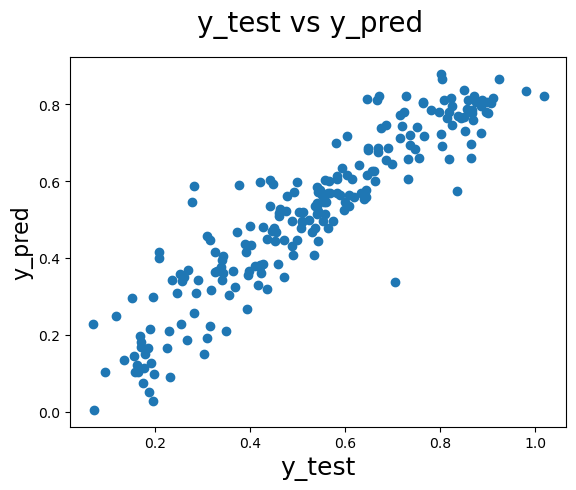

In [128]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

## Observation
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

In [129]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                        # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

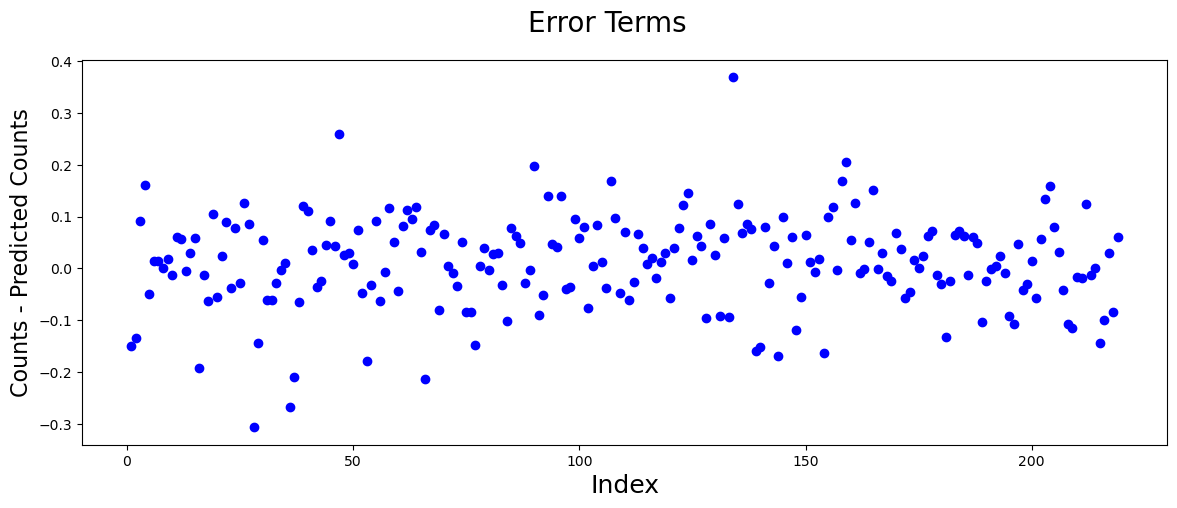

In [131]:
#Plot error terms for test data
plot_err_terms(y_test,y_pred)

The error terms are randomly distributed

## Conclusion
 1. There are more number of people taking bikes in clear weather. It is advisable to ensure the availabblity of bikes.
 2. We could see that the Fall and summer seasons have increased number of people taking bikes. It is advisable to ensure the availabblity of bikes.
 3. There is a considerable increase in people taking bikes in 2019 when compared to 2018.

## Varibles having high importance:
Positive contribution:
1. atemp
2. year is 2019
3. month (jan,feb,jul,nov,sep,dec)
4. holiday (y)
5. weather (light or mist)
6. season.

